<a href="https://colab.research.google.com/github/danielarruda1000/hypothesis_tests/blob/main/hypothesis_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis test with python exemples!
* Source article: https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

# Normality Tests

### Shapiro-Wilk Test
* Evaluates a data sample and quantifes how likely it is that the data was drawn from a Gaussian distribuition

In [7]:
from numpy.random import seed
from numpy.random import randn, rand
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Statistics=0.984, p=0.275
The data looks Gaussian (Fail to reject null hypothesis)


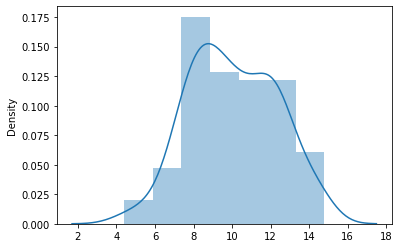

In [ ]:
# Creating normal distribution dataset
seed(123)
data_normal = 2 * randn(100) + 10
stat, p = shapiro(data_normal)
alpha = 0.05

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
  print('The data looks Gaussian (Fail to reject null hypothesis)')
else:
  print('The data doe not look Gaussian (Reject H0) ')

sns.distplot(data_normal)
plt.show()

## D'Agostino's K^2 Test
* Determine if the data distribution departs from the normal distribution. Calculates summary statistics namely Kurtosis and Skewness.
* Kurtosis quantifiles how much of the distribution is in the tail
* Skewness quantifiles how much a distribution is push left or right

In [ ]:
from scipy.stats import normaltest

Statistic: 5.131 | P-value: 0.077
Data normaly distributed (Fail to reject H0)


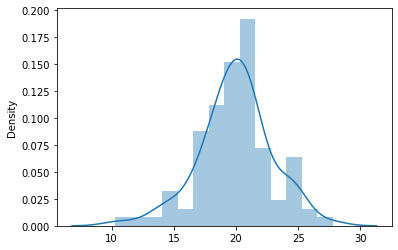

In [ ]:
data = 3* randn(100) + 20

stat, p = normaltest(data)
alpha= 0.05

print(f'Statistic: {round(stat,3)} | P-value: {round(p,3)}')

if p > alpha:
  print('Data normaly distributed (Fail to reject H0)')
else:
  print('Data is not Gaussian (Reject H0)')

sns.distplot(data)
plt.show()

## Anderson-Darlin Test
* Assumption: Observation on the sample are independent and identically distributed

In [ ]:
from scipy.stats import anderson

Statistic: 0.308
Probaly Gaussian at the 15% level
Probaly Gaussian at the 10% level
Probaly Gaussian at the 5% level
Probaly Gaussian at the 2% level
Probaly Gaussian at the 1% level


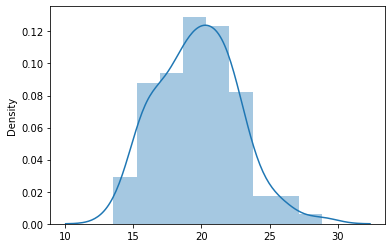

In [ ]:
data = 3* randn(100) + 20

result = anderson(data)

stat = round(result.statistic,3)
print(f'Statistic: {stat}')
for i in range(len(result.critical_values)):
  sl, cv = result.significance_level[i], result.critical_values[i]

  if stat < cv:
    print(f'Probaly Gaussian at the {round(sl)}% level')
  else:
    print(f'Probaly not Gaussian ate the {round(sl)}% level')

sns.distplot(data)
plt.show()

# Correlation Tests

## Pearson’s Correlation Coefficient
* Test whether two samples have a linear relationship
* Assumption: The samples have normal distribution

In [ ]:
from scipy.stats import pearsonr

data1 = 2 * randn(100) + 10
data2 = data1/2

stat, p = pearsonr(data1, data2)

print(f'Stat: {round(stat,2)}, P-value: {round(p,3)}')

if p > 0.05:
  print('Probably independent')
else:
  print('Probably dependent')

Stat: 1.0, P-value: 0.0
Probably dependent


## Spearman’s Rank Correlation
* Tests whether two samples have a monotonic relationship. Quantify the association between variables using the ordinal relationship between the values
* Assumptions: The samples doesn't have normal distribution

In [ ]:
from scipy.stats import spearmanr

data1 = rand(100)
data2 = data1/2

stat, p = spearmanr(data1, data2)

print(f'Stat: {round(stat,2)}, P-value: {round(p,3)}')

if p > 0.05:
  print('Probably independent')
else:
  print('Probably dependent')


Stat: 1.0, P-value: 0.0
Probably dependent


## Chi-Squared Test
* Tests whether two categorical variables are related or independent.

In [ ]:
from scipy.stats import chi2_contingency

table = [[10, 20, 30],[6,  9,  17]]

stat, p, dof, expeted = chi2_contingency(table)

if p > 0.05:
  print('Probably independent')
else:
  print('Probably dependent')

Probably independent


# Stationary Tests

## Augmented Dickey-Fuller Unit Root Test
* Tests whether a time series has a unit root, e.g. has a trend or more generally is autoregressive.

In [5]:
from statsmodels.tsa.stattools import adfuller

serie = [0,1,3,4,5,6,7,8,9]

stat, p, lags, obs, crit, t = adfuller(serie)

print('stat=%.3f, p=%.3f' % (stat, p))
if p> 0.05:
  print('Probably not Stationary')
else:
  print('Probably Stationary')

stat=-1.291, p=0.633
Probably not Stationary


## Kwiatkowski-Phillips-Schmidt-Shin
* Tests whether a time series is trend stationary or not.

In [6]:
from statsmodels.tsa.stattools import kpss
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
stat, p, lags, crit = kpss(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Stationary')
else:
	print('Probably not Stationary')

stat=0.410, p=0.073
Probably Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


# Parametric Statistical Hypothesis Tests

## Student's t-test
* Tests whether the means of two samples are signicantly diffente
#### Assumptions:
* 1) Each sample are independnet and identically distribuited (idd)
* 2) Each sample are normally distributed
* 3) Each sample have the same variance
#### Interpretation:
* H0: The means of the sample are equal
* H1: The means of the sample are unequal

In [19]:
from scipy.stats import ttest_ind

data1 = 3* randn(100) + 10
data2 = 5 * randn(100)

stat, p = ttest_ind(data1,data2)

print(f'Stat:{round(stat,2)}, P-value: {round(p,3)}')

if p > 0.05:
  print('Probably the same distributuion')
else:
  print('Probably different distribution')

Stat:16.37, P-value: 0.0
Probably different distribution


# Paired Student's t-test
* Tests whether the means of two paired samples are significantly different.

#### Assumptions

* Each sample are independent and identically distributed (iid).
* Each sample are normally distributed.
* Each sample have the same variance.
* Observations across each sample are paired.

#### Interpretation

* H0: the means of the samples are equal.
* H1: the means of the samples are unequal.

In [33]:
from scipy.stats import ttest_rel

data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

stat, p = ttest_rel(data1, data2)

print(f'Stat:{round(stat,2)}, P-value: {round(p,3)}')

if p > 0.05:
  print('Probably the same distributuion')
else:
  print('Probably different distribution')

Stat:-0.33, P-value: 0.746
Probably the same distributuion


# Analysis of Variance Test (ANOVA)
* Tests whether the means of two or more independent samples are significantly different

#### Assumptions:
* Each sample are iid
* Normal distributed
* Each sample have same variance

#### Interpretation
* H0: the means of the samples are equal
* H1: The means of the samples are unequal

In [34]:
from scipy.stats import f_oneway

data1 = 2 * randn(100) + 10
data2 = 3* randn(100) + 10
data3 = 4 *randn(100) + 10

stat, p = f_oneway(data1, data2,data3)

print(f'Stat:{round(stat,2)}, P-value: {round(p,3)}')

if p > 0.05:
  print('Probably the same distributuion')
else:
  print('Probably different distribution')

Stat:2.04, P-value: 0.132
Probably the same distributuion


# Nonparametric Statistical Hypothesis Tests

### Mann-Whitney U Test
* Tests wheter the distributions of two independet samples are equal or not

#### Assumptions
* Each sample are iid
* Each sample can be ranked

#### Interpretation
* H0: both samples are equal
* H1: both samples are unequal

In [40]:
from scipy.stats import mannwhitneyu

data1 = 3* rand(10) + 10
data2 = 2* rand(10) + 10

stat, p = mannwhitneyu(data1, data2)

print(f'Stat:{round(stat,2)}, P-value: {round(p,3)}')

if p > 0.05:
  print('Probably the same distributuion')
else:
  print('Probably different distribution')

Stat:47.0, P-value: 0.425
Probably the same distributuion


# Wilcoxon Signed-Rank Test
* Tests wheter the distribution of two paired samples are equal or not

#### Assumption
* Each sample are iid
* Each sample can be ranked
* Each sample are paired

#### Interpretation
* H0: both distribution samples are equal
* H1: both distribuition samples are unequal

In [42]:
from scipy.stats import wilcoxon

data1 = 2 * rand(10) + 10
data2 = 3 * rand(10) + 10

stat, p = wilcoxon(data1, data2)

print(f'Stat:{round(stat,2)}, P-value: {round(p,3)}')
if p > 0.05:
  print('Probably the same distributuion')
else:
  print('Probably different distribution')

Stat:22.0, P-value: 0.575
Probably the same distributuion


# Kruskal-Wallis H test
* Test whether the distributuion of tow or more independet samples are equal or not

#### Assumptions
* Each sample are iid
* Each sample can be ranked

#### Interpretation
* H0: All distribution samples are equal
* H1: The distribution of one or more samples aren't equal

In [43]:
from scipy.stats import kruskal

data1 = 3 * rand(10) + 10
data2 = 4 * rand(10) + 10

stat, p = kruskal(data1, data2)

print(f'Stat:{round(stat,2)}, P-value: {round(p,3)}')
if p > 0.05:
  print('Probably the same distributuion')
else:
  print('Probably different distribution')

Stat:2.52, P-value: 0.112
Probably the same distributuion


# Friedman Test
* Test whether the distribution of two or more paired samples are equal or not

#### Assumptions
* Each sample are iid
* Each sample can be ranked
* Observations across each sample are paired

#### Interpretation

* H0: the distributions of all samples are equal
* H1: the distributions of one or more samples are not equal

In [45]:
from scipy.stats import friedmanchisquare

data1 = 3 * rand(10) + 10
data2 = 4 * rand(10) + 10
data3 = 5 * rand(10) + 10

stat, p = friedmanchisquare(data1, data2, data3)

print(f'Stat:{round(stat,2)}, P-value: {round(p,3)}')
if p > 0.05:
  print('Probably the same distributuion')
else:
  print('Probably different distribution')

Stat:3.2, P-value: 0.202
Probably the same distributuion
